In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def forward(x):
    y=w*x+b
    return y

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

In [3]:
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)
X=torch.arange(-3,3,0.1).view(-1,1)
f=-3*X
Y=f+0.1*torch.randn(X.size())

In [4]:
plt.plot(X.numpy(),f.numpy())
plt.show()

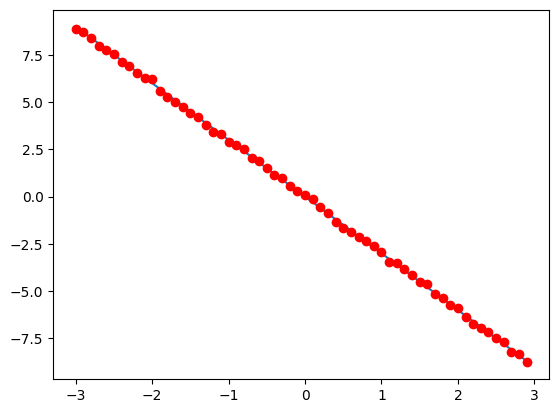

In [5]:
plt.plot(X.numpy(),f.numpy())
plt.plot(X.numpy(),Y.numpy(),'ro')
plt.show()

In [6]:
f=1*X-1
Y=f+0.1*torch.randn(X.size())

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<Figure size 640x480 with 0 Axes>

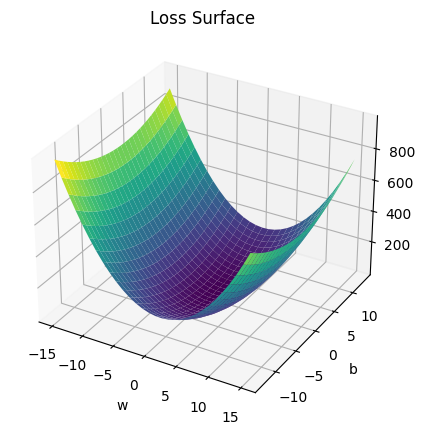

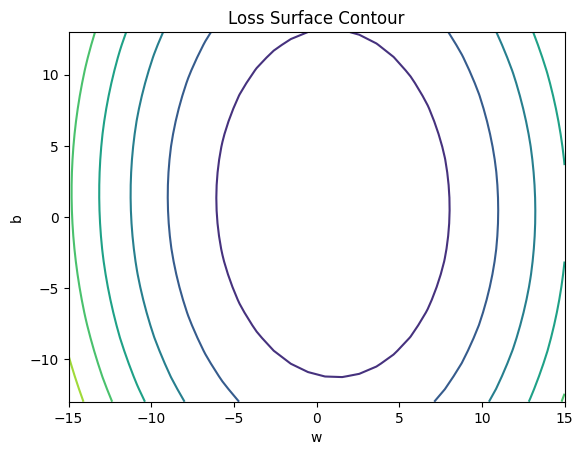

In [7]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30)

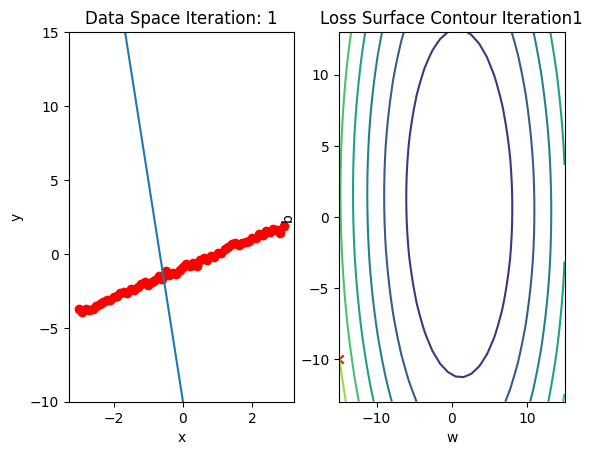

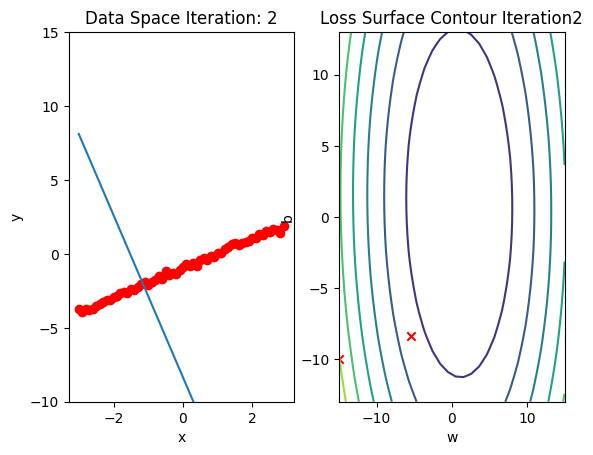

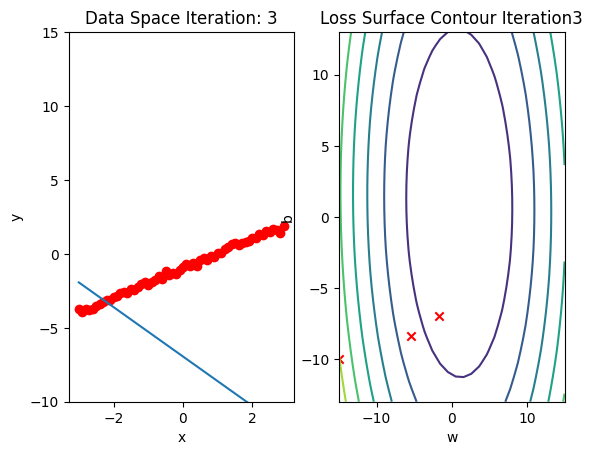

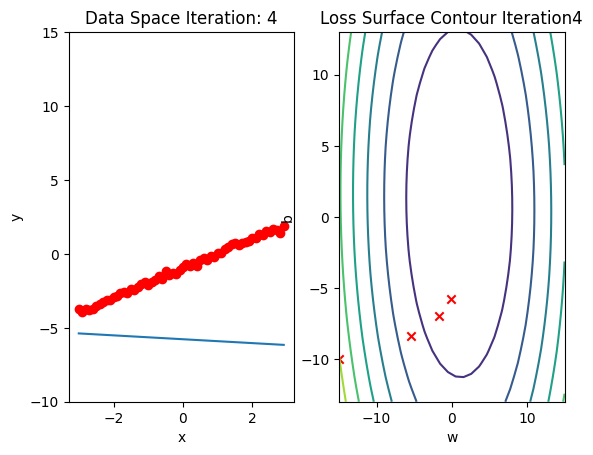

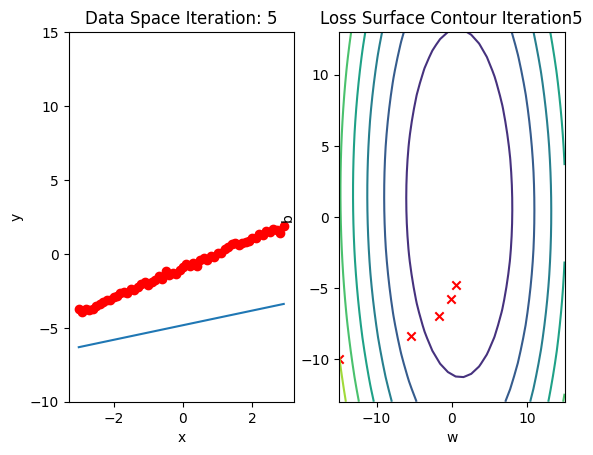

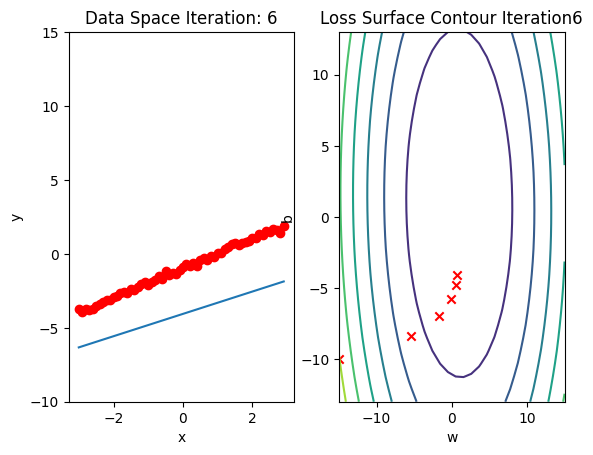

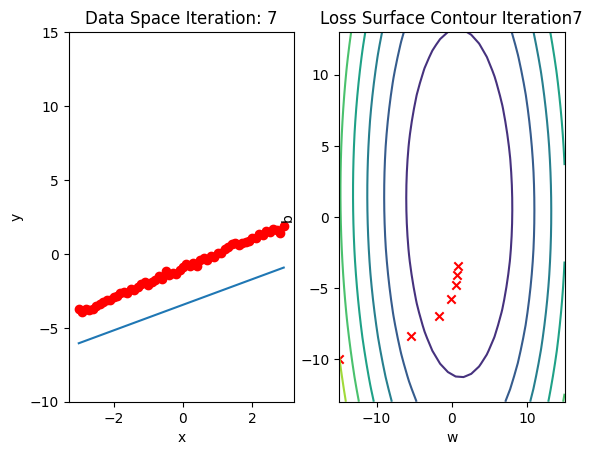

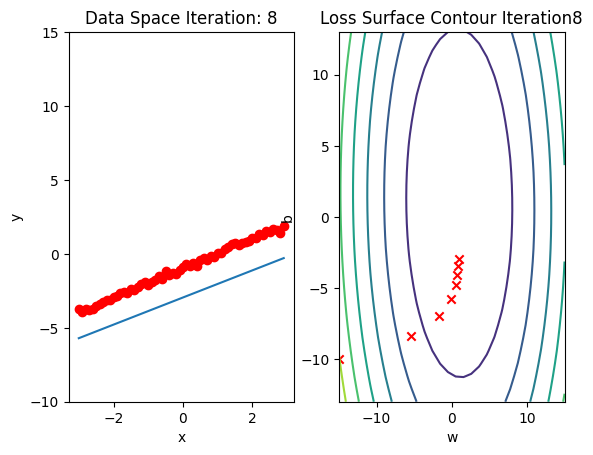

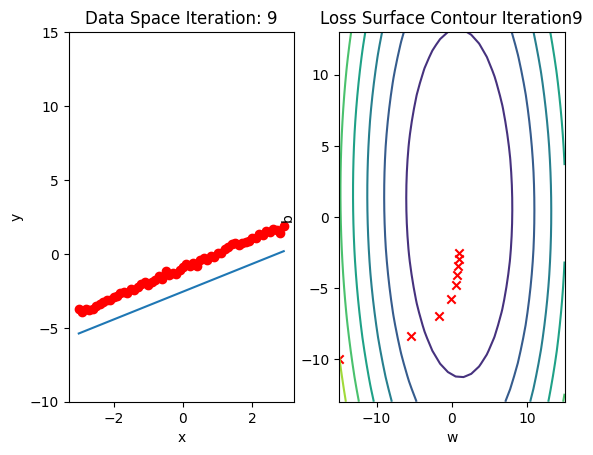

In [8]:
lr=0.1

LOSS_BGD=[]

for epoch in range(10):
    total=0
    yhat=forward(X)
    loss=criterion(yhat,Y)
    get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
    get_surface.plot_ps()
    LOSS_BGD.append(loss)
    total+=loss.item()
    loss.backward()
    w.data=w.data-lr*w.grad.data
    b.data=b.data-lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()
        
        

Train the Model: Stochastic Gradient Descent

In [9]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [10]:
LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

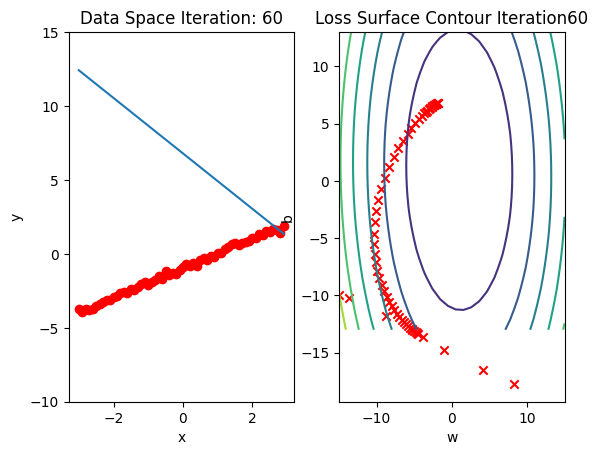

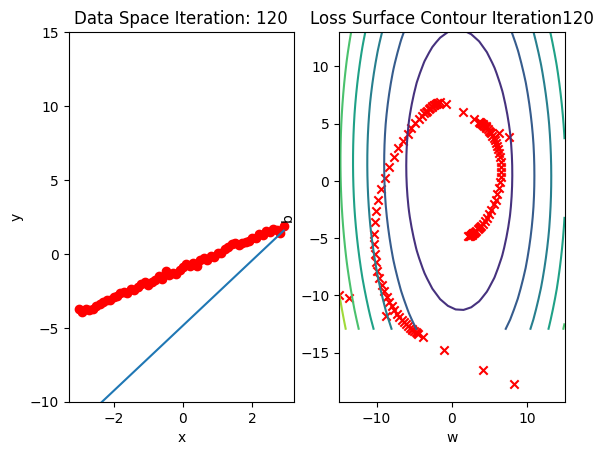

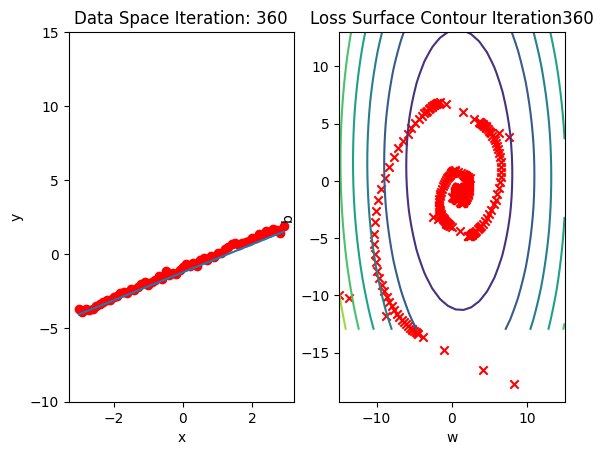

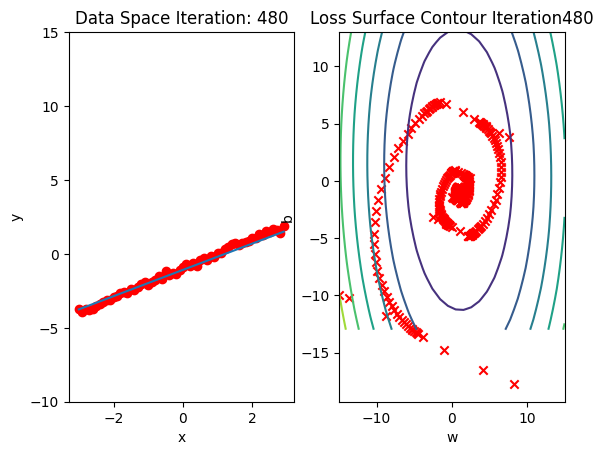

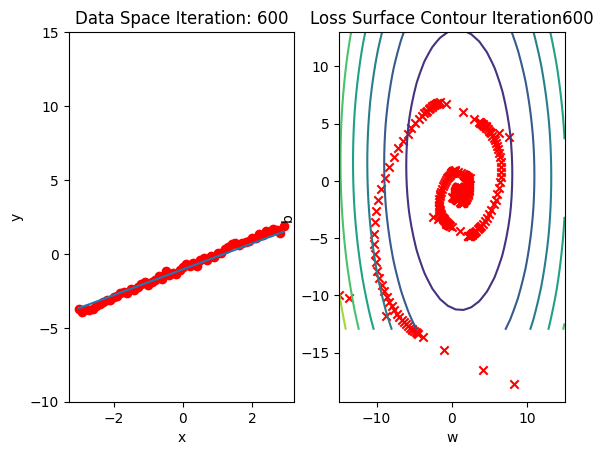

In [11]:
for epoch in range(10):
    Yhat=forward(X)
    LOSS_SGD.append(criterion(Yhat,Y).tolist())
    for x,y in zip (X,Y):
        yhat=forward(x)
        loss=criterion(yhat,y)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    get_surface.plot_ps()  

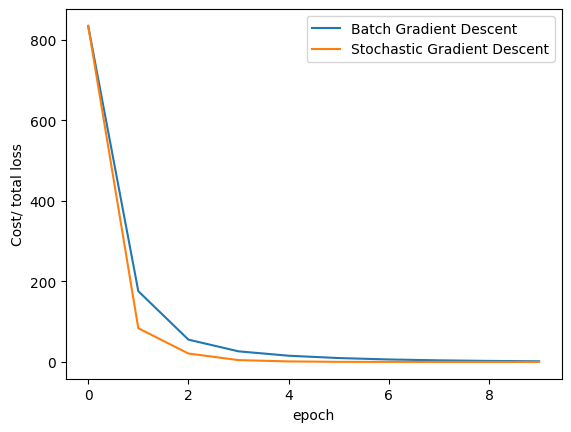

In [12]:
LOSS_BGD= [ loss.detach().numpy() for loss in LOSS_BGD]
plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

 <h2 id="Stochastic">Data load with Stochastic Gradient Descent</h2> 

In [13]:
from torch.utils.data import Dataset,DataLoader

In [14]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [15]:
class Data(Dataset):
    def __init__(self):
        self.x=torch.arange(-3,3,0.1).view(-1,1)
        self.y=1*self.x-1
        self.len=self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index],self.y[index]

    def __len__(self):
        return self.len

dataset=Data()
    

In [16]:
x,y=dataset[0:3]
print("The first 3 x: ", x)
print("The first 3 y: ", y)

The first 3 x:  tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
The first 3 y:  tensor([[-4.0000],
        [-3.9000],
        [-3.8000]])


In [17]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [18]:
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)
LOSS_Loader = []

In [19]:
trainloader=DataLoader(dataset=dataset,batch_size=1)

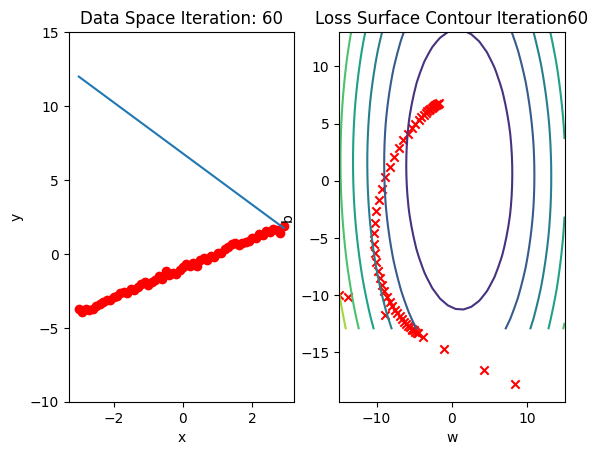

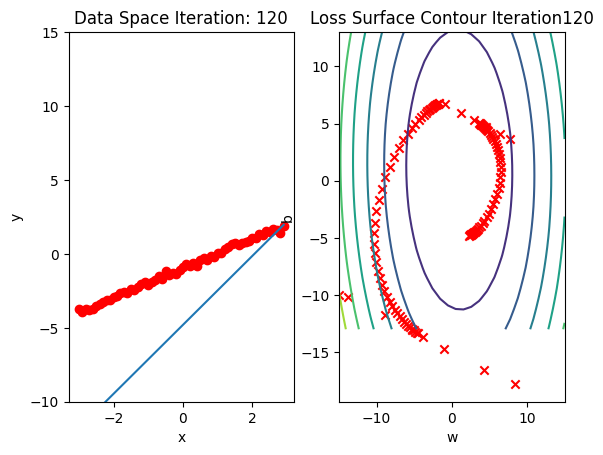

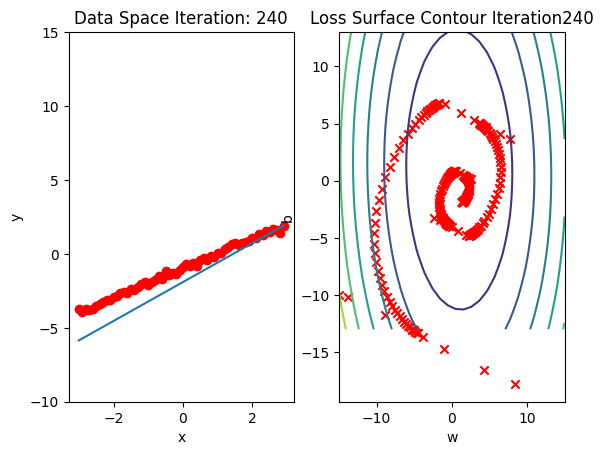

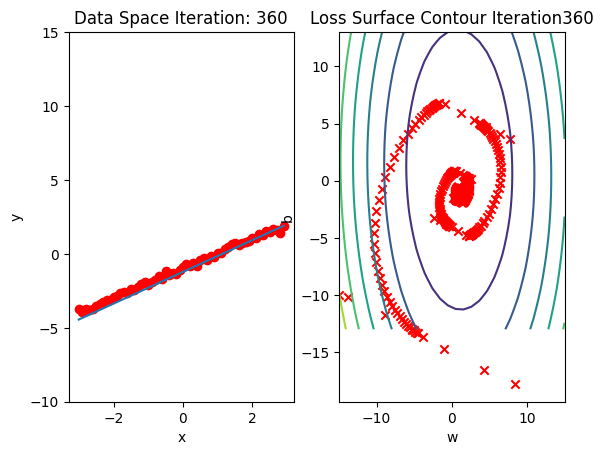

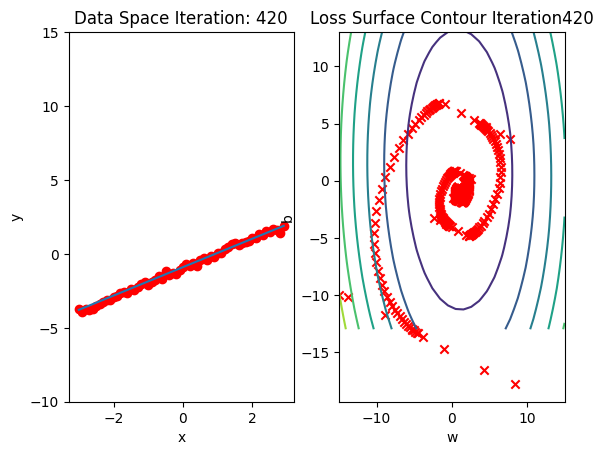

In [20]:
for epoch in range(10):
    Yhat=forward(X)
    LOSS_Loader.append(criterion(Yhat,Y).tolist())
    for x,y in trainloader:
        yhat=forward(x)
        loss=criterion(yhat,y)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    get_surface.plot_ps() 

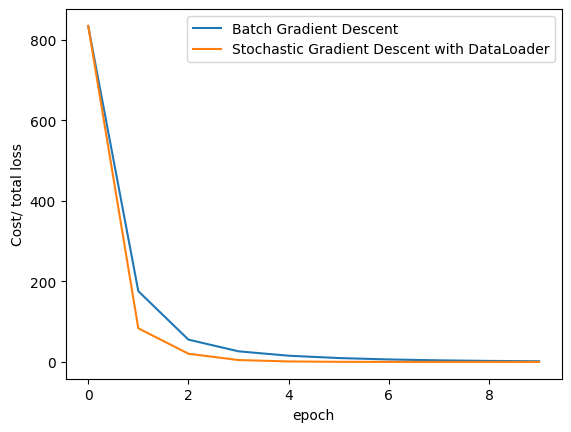

In [21]:
plt.plot(LOSS_BGD,label="Batch Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

In [22]:
plt.plot(LOSS_SGD,'--o',label="Stochastic Gradient Descent")
plt.plot(LOSS_Loader,label="Stochastic Gradient Descent with DataLoader")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

<h2 id="Mini10">Mini Batch Gradient Descent</h2> 


In [23]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [24]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 5)

In [25]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI5 = []
lr = 0.1

def train_model_Mini5(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI5.append(criterion(forward(X), Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

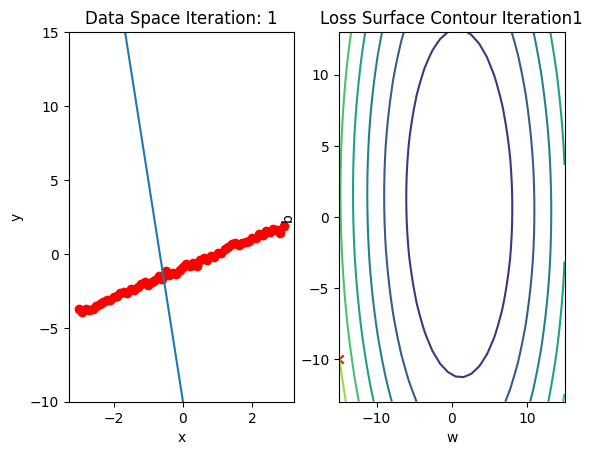

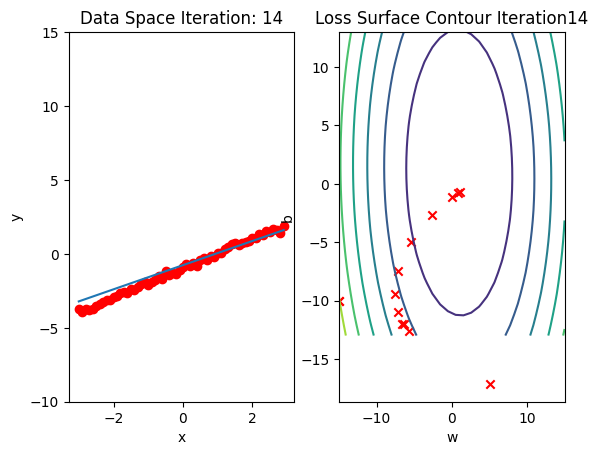

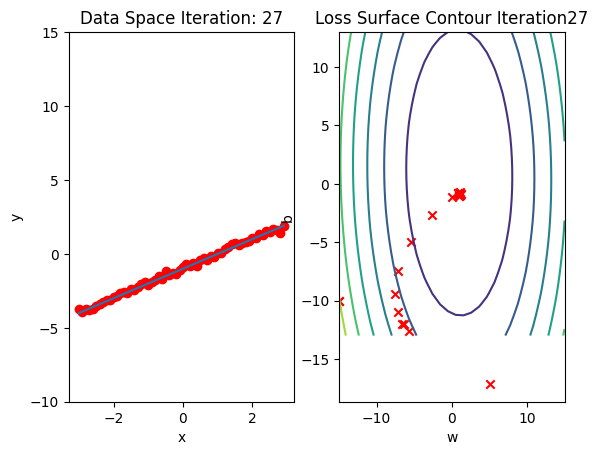

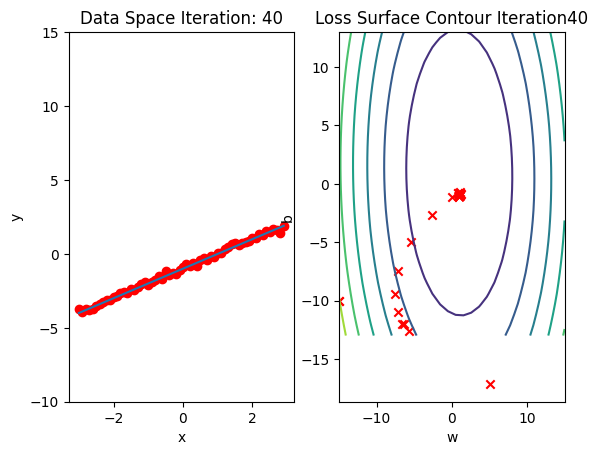

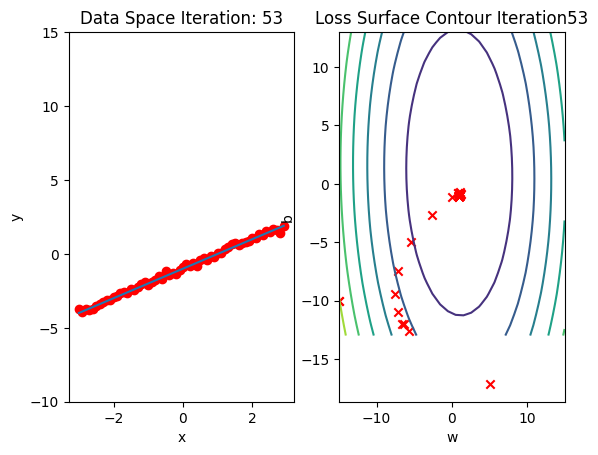

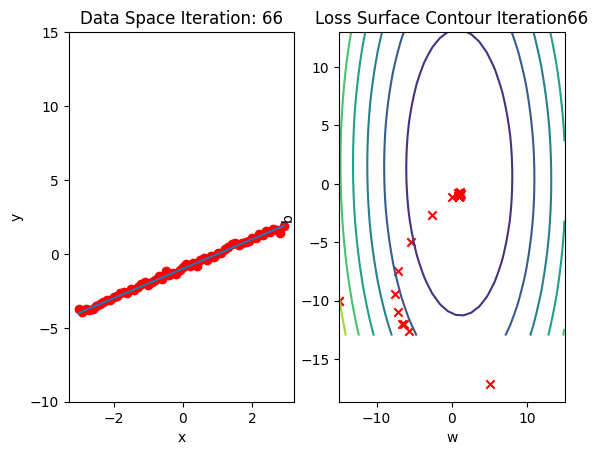

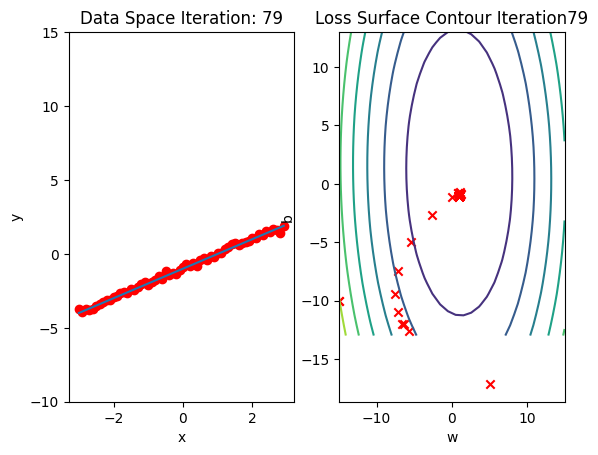

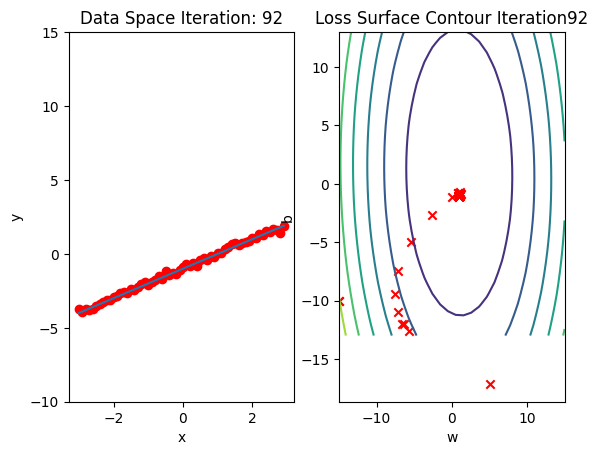

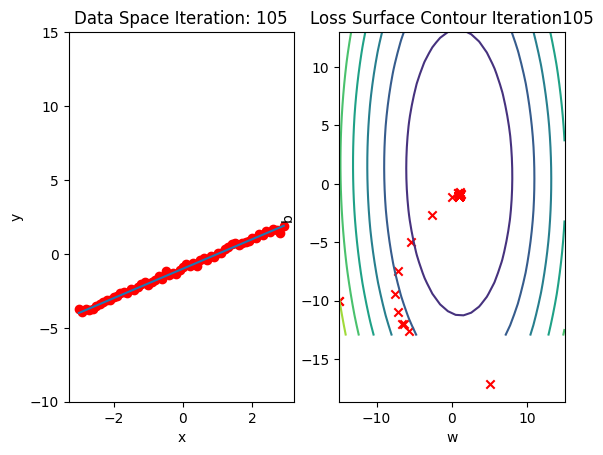

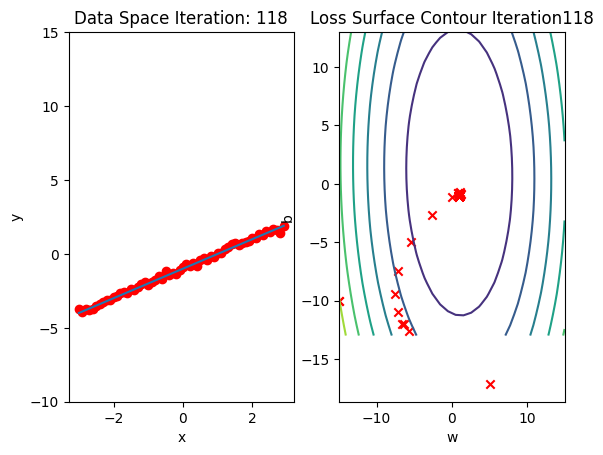

In [26]:
train_model_Mini5(10)

In [27]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [28]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

In [29]:
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI10 = []
lr = 0.1

def train_model_Mini10(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI10.append(criterion(forward(X),Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()

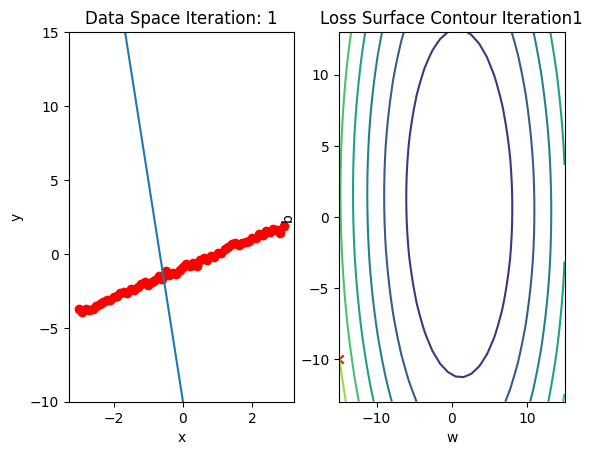

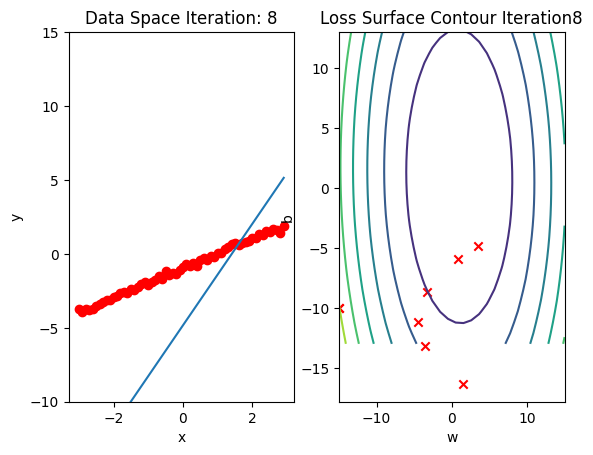

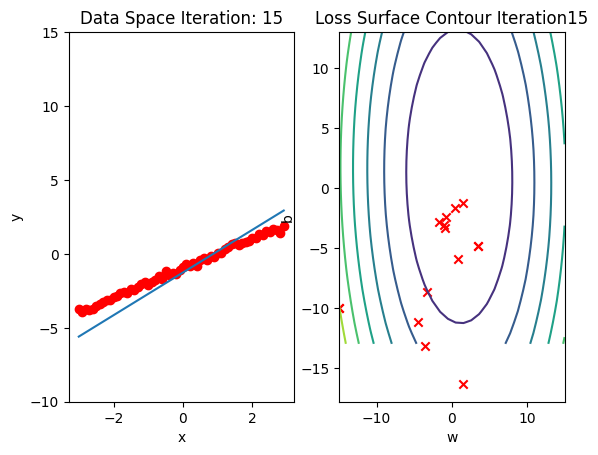

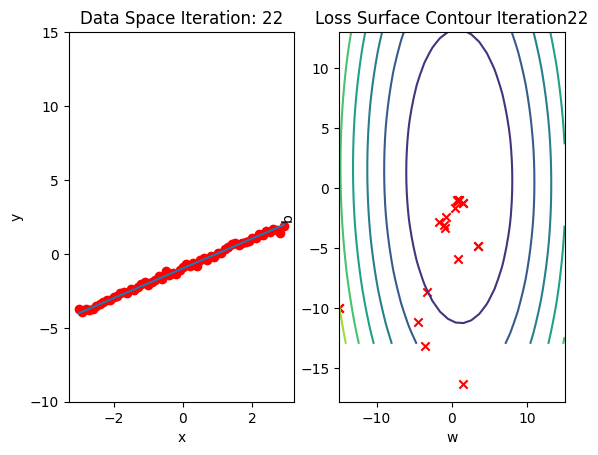

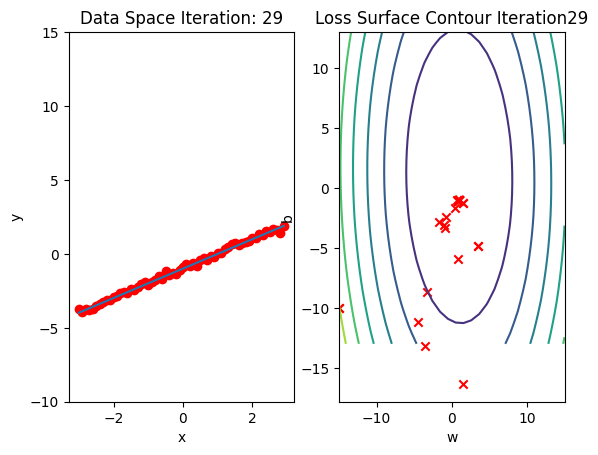

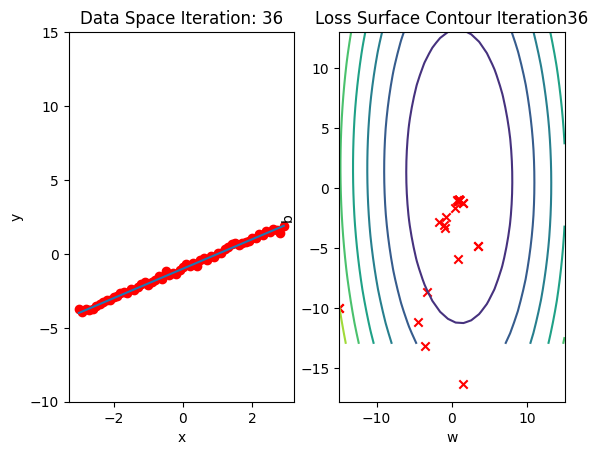

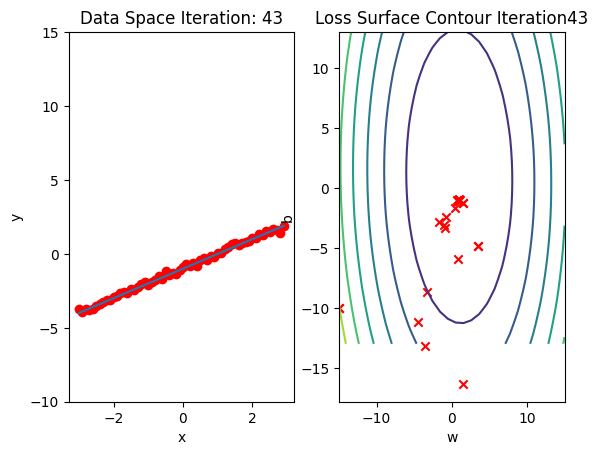

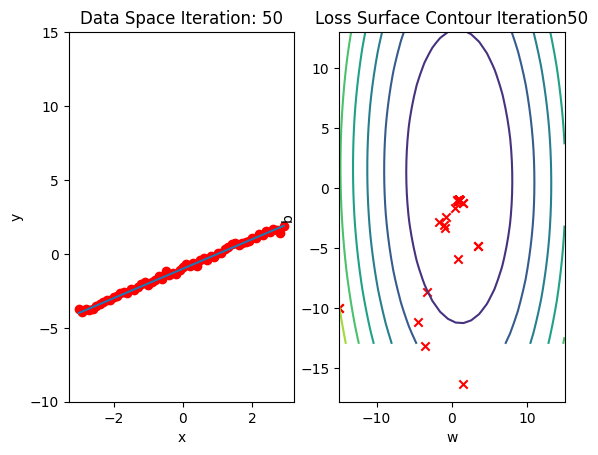

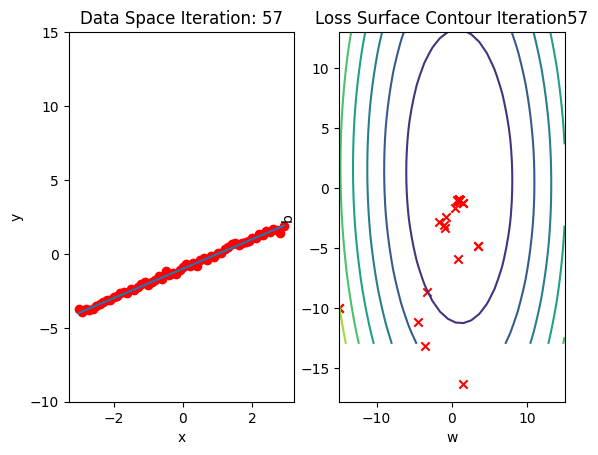

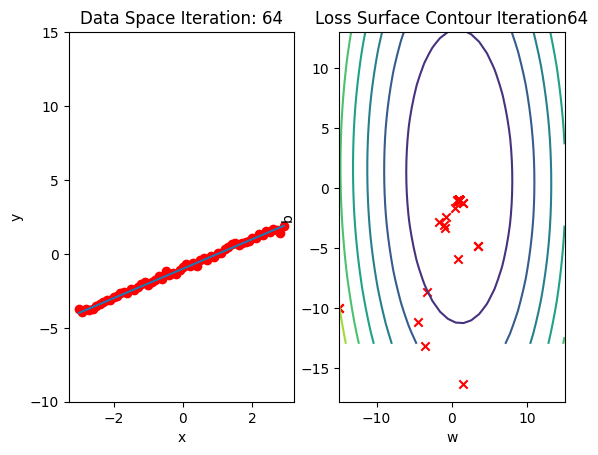

In [30]:
train_model_Mini10(10)

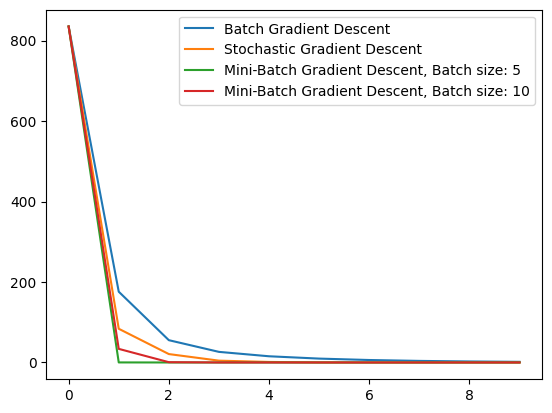

In [31]:
#LOSS_BGD= [ loss.detach().numpy() for loss in LOSS_BGD]
plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5,label = "Mini-Batch Gradient Descent, Batch size: 5")
plt.plot(LOSS_MINI10,label = "Mini-Batch Gradient Descent, Batch size: 10")
plt.legend()

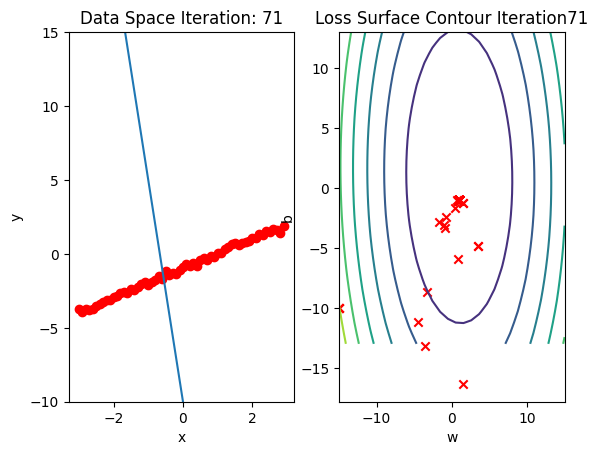

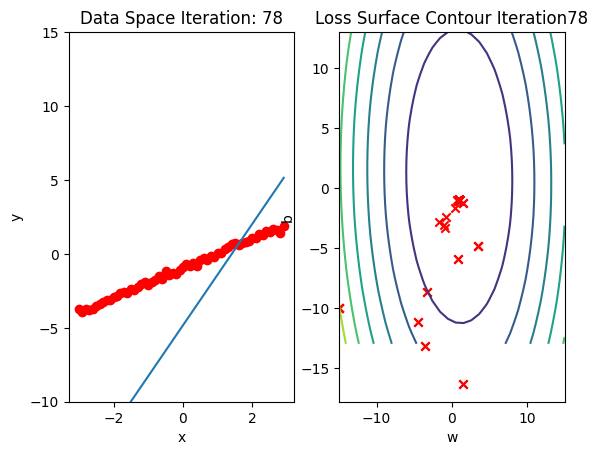

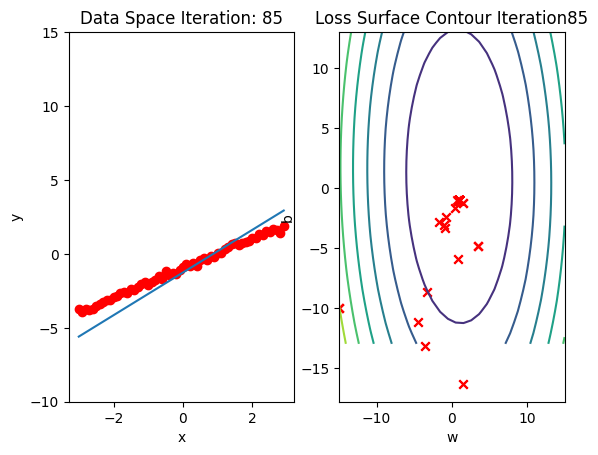

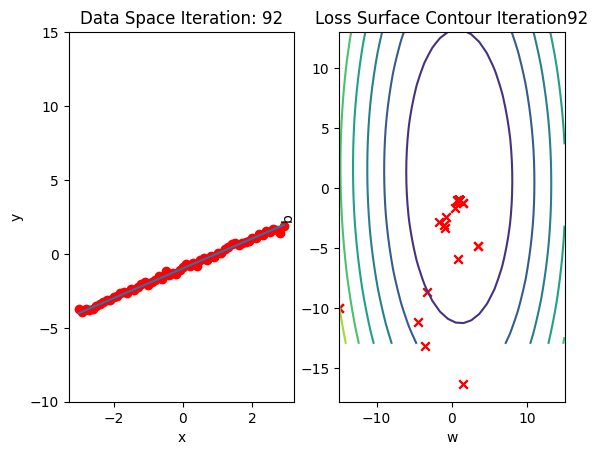

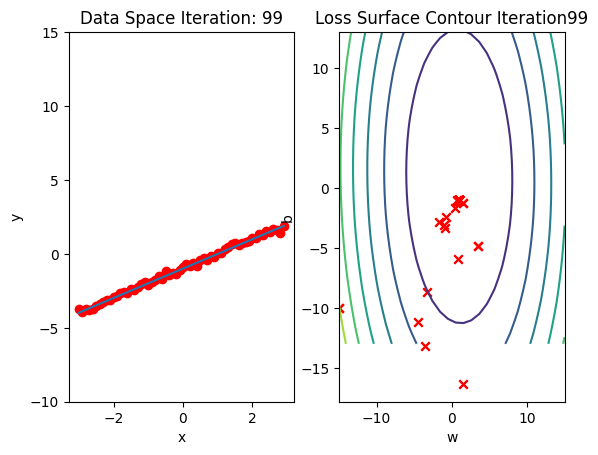

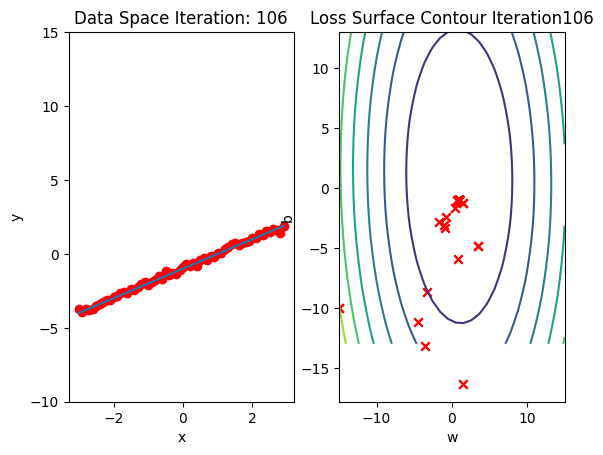

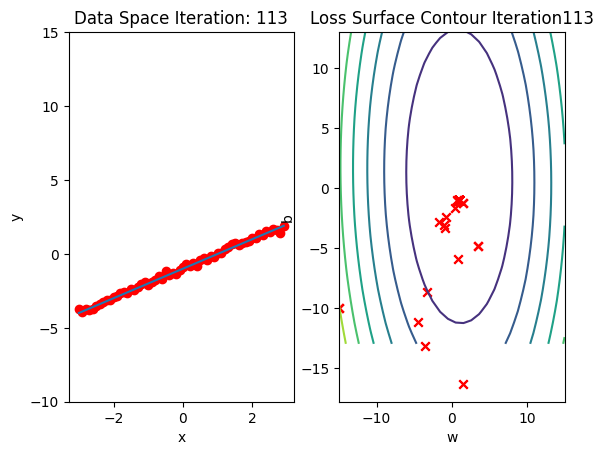

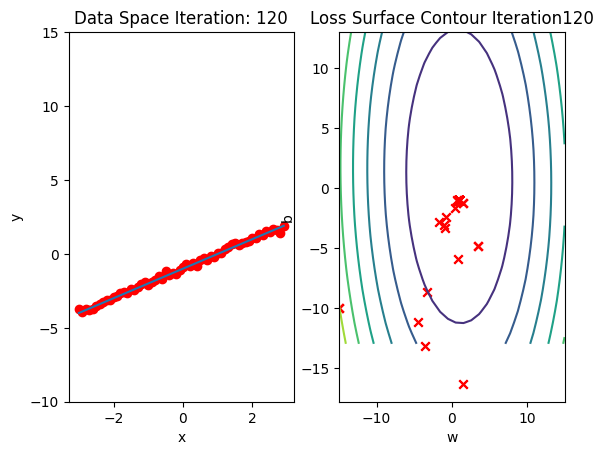

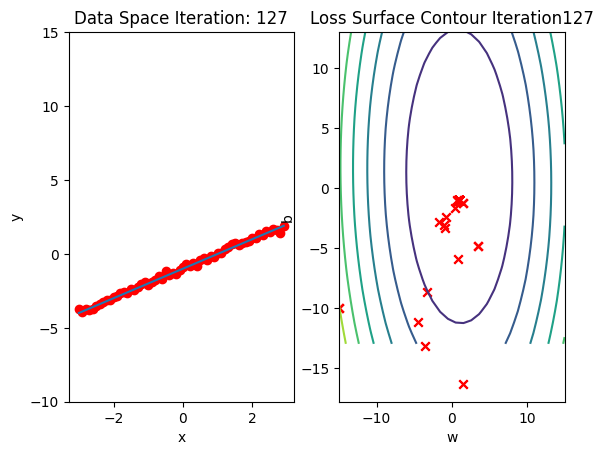

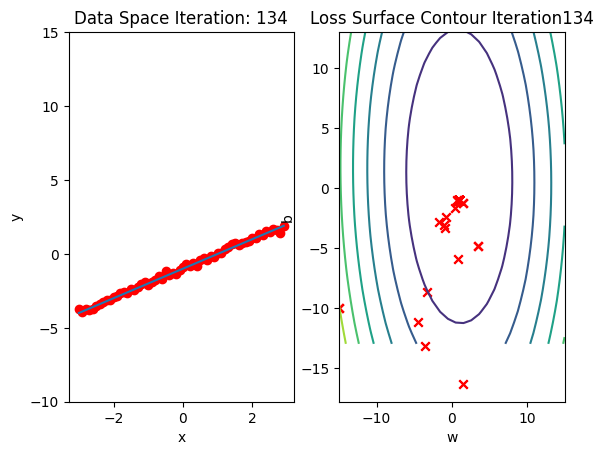

In [32]:
dataset = Data()
trainloader = DataLoader(dataset = dataset, batch_size = 10)

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
LOSS_MINI20 = []
lr = 0.1

def train_model_Mini20(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
        get_surface.plot_ps()
        LOSS_MINI20.append(criterion(forward(X),Y).tolist())
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
            
train_model_Mini20(10)

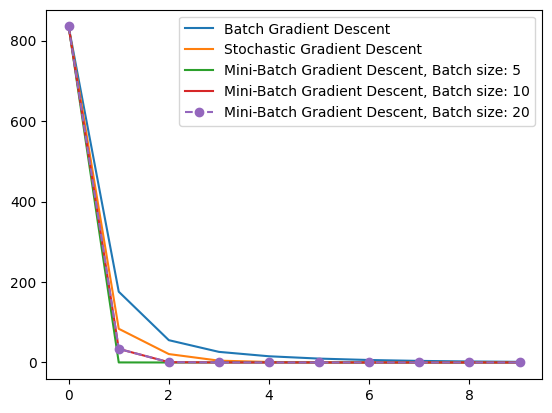

In [33]:
plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI5,label = "Mini-Batch Gradient Descent, Batch size: 5")
plt.plot(LOSS_MINI10,label = "Mini-Batch Gradient Descent, Batch size: 10")
plt.plot(LOSS_MINI20,"--o",label = "Mini-Batch Gradient Descent, Batch size: 20")
plt.legend()
